In [1]:
# Importing all necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importing the dataset in chunksize as it is a large dataset

chunk_telecom_df=pd.read_csv("telecom_churn_data.csv",engine='python',
                             encoding ='utf-8',low_memory=True,chunksize=25000,iterator=True)

df=pd.concat(chunk_telecom_df,ignore_index=True)

df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [3]:
#getting information about the data
df.info(verbose=1) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
mobile_number               int64
circle_id                   int64
loc_og_t2o_mou              float64
std_og_t2o_mou              float64
loc_ic_t2o_mou              float64
last_date_of_month_6        object
last_date_of_month_7        object
last_date_of_month_8        object
last_date_of_month_9        object
arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
arpu_9                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
onnet_mou_9                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
offnet_mou_9                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_ic_mou_9               float6

In [4]:
df.describe(include='all') # Describing the dataset to check outliers

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999,99398,98899,98340,99999.000000,...,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
unique,NaN,NaN,NaN,NaN,NaN,1,1,1,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,6/30/2014,7/31/2014,8/31/2014,9/30/2014,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,99999,99398,98899,98340,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,7.001207e+09,109.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,282.987358,...,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,328.439770,...,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,109.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,-2258.709000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,109.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,93.411500,...,0.000000,1.000000,1.000000,1.000000,1.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001205e+09,109.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,197.704000,...,0.000000,1.000000,1.000000,1.000000,1.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,109.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,371.060000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1807.500000,0.000000,0.000000,0.000000,0.000000


## Handling missing values

In [5]:
# look at missing value ratio in each column
df.isnull().mean()*100

mobile_number     0.00000
circle_id         0.00000
loc_og_t2o_mou    1.01801
std_og_t2o_mou    1.01801
loc_ic_t2o_mou    1.01801
                   ...   
aon               0.00000
aug_vbc_3g        0.00000
jul_vbc_3g        0.00000
jun_vbc_3g        0.00000
sep_vbc_3g        0.00000
Length: 226, dtype: float64

### impute missing values

##### Imputing with zeroes

In [6]:
# Imputing recharge columns
rechargeColumns = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
                 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9',
                 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9',
                 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9',
                 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
                 ]

df[rechargeColumns].describe(include='all')

,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9
count,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.00000,25153.000000,25571.000000,26339.000000,25922.000000
mean,2.463802,2.666419,2.651999,2.441170,1.864668,2.044699,2.016288,1.781807,0.599133,0.621720,0.635711,0.659363,126.393392,126.729459,125.717301,124.94144,192.600982,200.981292,197.526489,192.734315
std,2.789128,3.031593,3.074987,2.516339,2.570254,2.768332,2.720132,2.214701,1.274428,1.394524,1.422827,1.411513,108.477235,109.765267,109.437851,111.36376,192.646318,196.791224,191.301305,188.400286
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.500000,0.500000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,25.000000,25.000000,25.000000,25.00000,82.000000,92.000000,87.000000,69.000000
50%,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,145.000000,145.000000,145.000000,145.00000,154.000000,154.000000,154.000000,164.000000
75%,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,177.000000,177.000000,179.000000,179.00000,252.000000,252.000000,252.000000,252.000000
max,61.000000,54.000000,60.000000,84.000000,42.000000,48.000000,44.000000,40.000000,29.000000,35.000000,45.000000,49.000000,1555.000000,1555.000000,1555.000000,1555.00000,7546.000000,4365.000000,4076.000000,4061.000000


In [7]:
# Whenever recharge data and date is missing, we can conclude that customer hasn't recharged on that particular day, so we can impute those records with 0
df.loc[df.total_rech_data_6.isnull() & df.date_of_last_rech_data_6.isnull(), ["total_rech_data_6", "date_of_last_rech_data_6"]].head(20)

,total_rech_data_6,date_of_last_rech_data_6
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
5,NaN,NaN
6,NaN,NaN
7,NaN,NaN
8,NaN,NaN
9,NaN,NaN
10,NaN,NaN
11,NaN,NaN


In [8]:
# List of recharge columns which can be imputed with 0s
nonRecharged = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
        'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
        'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9'
       ]

In [9]:
# impute missing values with 0
df[nonRecharged] = df[nonRecharged].apply(lambda x: x.fillna(0))

In [10]:
# now, let's make sure values are imputed correctly

print(df[nonRecharged].isnull().sum()*100/df.shape[1])

print(df[nonRecharged].describe(include='all'))

total_rech_data_6     0.0
total_rech_data_7     0.0
total_rech_data_8     0.0
total_rech_data_9     0.0
av_rech_amt_data_6    0.0
av_rech_amt_data_7    0.0
av_rech_amt_data_8    0.0
av_rech_amt_data_9    0.0
max_rech_data_6       0.0
max_rech_data_7       0.0
max_rech_data_8       0.0
max_rech_data_9       0.0
dtype: float64
       total_rech_data_6  total_rech_data_7  total_rech_data_8  \
count       99999.000000       99999.000000       99999.000000   
mean            0.619726           0.681837           0.698517   
std             1.760541           1.924382           1.963417   
min             0.000000           0.000000           0.000000   
25%             0.000000           0.000000           0.000000   
50%             0.000000           0.000000           0.000000   
75%             1.000000           1.000000           1.000000   
max            61.000000          54.000000          60.000000   

       total_rech_data_9  av_rech_amt_data_6  av_rech_amt_data_7  \
count     

In [11]:
# Checking null values for all columns
round(df.isnull().mean(),2)

mobile_number     0.00
circle_id         0.00
loc_og_t2o_mou    0.01
std_og_t2o_mou    0.01
loc_ic_t2o_mou    0.01
                  ... 
aon               0.00
aug_vbc_3g        0.00
jul_vbc_3g        0.00
jun_vbc_3g        0.00
sep_vbc_3g        0.00
Length: 226, dtype: float64

In [12]:
categColumns =  ['night_pck_user_6',
             'night_pck_user_7',
             'night_pck_user_8',
             'night_pck_user_9',
             'fb_user_6',
             'fb_user_7',
             'fb_user_8',
             'fb_user_9'
            ]


## Replace NaN values in categorical variables
 - We will replace missing values in the categorical values with '-1'

In [13]:
# Replacing null records with '-1' in categorical columns
df[categColumns] = df[categColumns].apply(lambda x: x.fillna(-1))

In [14]:
# Crosschecking nulls percentage
df[categColumns].isnull().mean()

night_pck_user_6    0.0
night_pck_user_7    0.0
night_pck_user_8    0.0
night_pck_user_9    0.0
fb_user_6           0.0
fb_user_7           0.0
fb_user_8           0.0
fb_user_9           0.0
dtype: float64

## Dropping columns/rows having null values more than 30% from the total dataset

In [15]:
# Columns

invalidColumns=df.isnull().sum(axis=0)
invalidColumns=invalidColumns[invalidColumns.values/len(df)>0.30]
len(invalidColumns)

20

In [16]:
# Dropping the columns which have more than 30% null values

invalidColumns=list(invalidColumns.keys())
df=df.drop(invalidColumns,axis=1)

In [17]:
# Cross Checking null columns

invalidColumns=df.isnull().sum(axis=0)
invalidColumns=invalidColumns[invalidColumns.values/len(df)>0.30]
len(invalidColumns)

0

##### 20 columns were dropped having more than 30% null values, no rows are having more than 30% null values hence not dropped any rows.

In [18]:
# Checking again now for null values
round(df.isnull().sum(axis=0)/len(df)*100,2) 

mobile_number     0.00
circle_id         0.00
loc_og_t2o_mou    1.02
std_og_t2o_mou    1.02
loc_ic_t2o_mou    1.02
                  ... 
aon               0.00
aug_vbc_3g        0.00
jul_vbc_3g        0.00
jun_vbc_3g        0.00
sep_vbc_3g        0.00
Length: 206, dtype: float64

#### First, dropping redundant columns and imputing median value for numerical columns as we have outliers and median is the best choice to make.

In [19]:
# Dropping redundant columns

df=df.drop(['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou'],axis=1)

df=df.fillna(df.median())

In [20]:
# Checking for null values if left any.
df.columns[df.isnull().any()].tolist()

['last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_9']

#### Imputing values with maximum occurance for a particular columns

In [21]:
df['last_date_of_month_7']=df['last_date_of_month_7'].fillna(df['last_date_of_month_7'].unique().tolist()[0])
df['last_date_of_month_8']=df['last_date_of_month_8'].fillna(df['last_date_of_month_8'].unique().tolist()[0])
df['last_date_of_month_9']=df['last_date_of_month_9'].fillna(df['last_date_of_month_9'].unique().tolist()[0])

In [22]:
df['date_of_last_rech_6']=df['date_of_last_rech_6'].fillna(df['date_of_last_rech_6'].value_counts().keys()[0])
df['date_of_last_rech_7']=df['date_of_last_rech_7'].fillna(df['date_of_last_rech_7'].value_counts().keys()[0])
df['date_of_last_rech_8']=df['date_of_last_rech_8'].fillna(df['date_of_last_rech_8'].value_counts().keys()[0])
df['date_of_last_rech_9']=df['date_of_last_rech_9'].fillna(df['date_of_last_rech_9'].value_counts().keys()[0])

In [23]:
df.columns[df.isnull().any()].tolist()

[]

##### Now, our databaset is totally cleaned and ready for the next step of analysis

# Data Visualization

### Univariate analysis

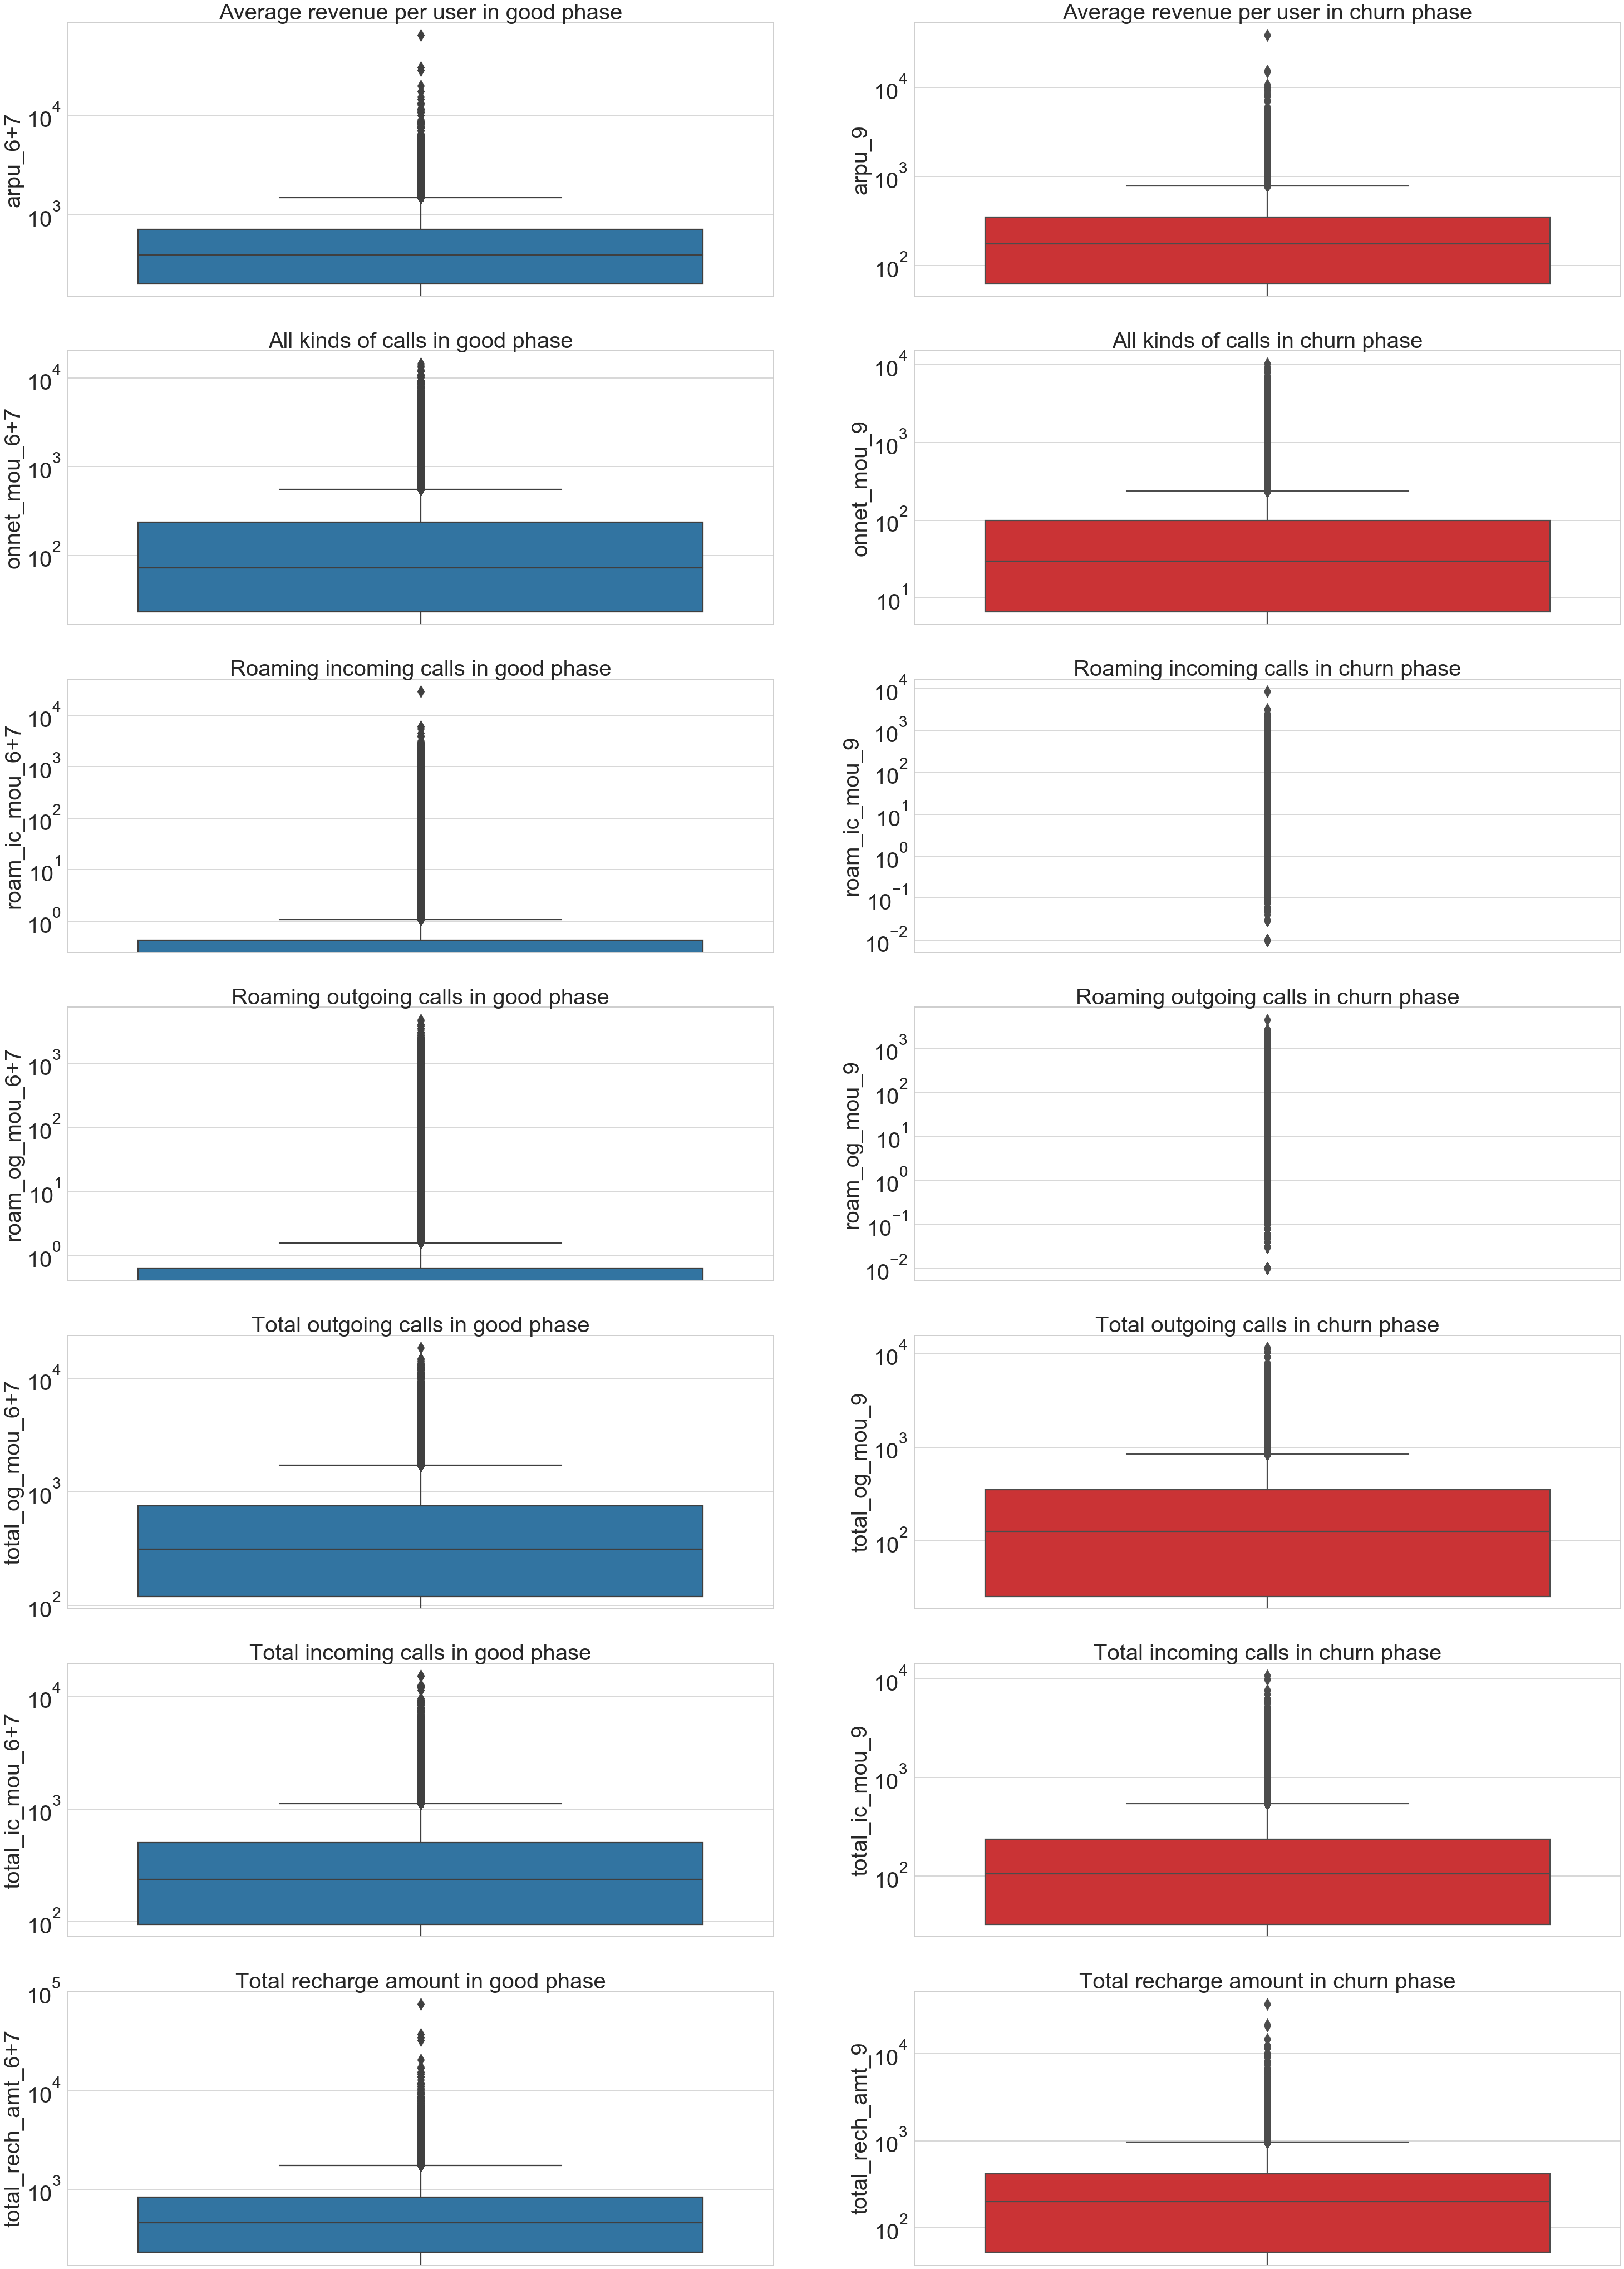

In [24]:

# Setting size of figure, context and gridlines

plt.figure(figsize=(50,150))
plt.tight_layout()
sns.set_style('whitegrid')
sns.set_context('talk')

# Title and columns names for the dataset

col={0:['arpu_6','arpu_7','Average revenue per user in good phase'],1:['arpu_9','Average revenue per user in churn phase'],
     2:['onnet_mou_6','onnet_mou_7','All kinds of calls in good phase'],3:['onnet_mou_9','All kinds of calls in churn phase'],
     4:['roam_ic_mou_6','roam_ic_mou_7','Roaming incoming calls in good phase'],5:['roam_ic_mou_9','Roaming incoming calls in churn phase'],
     6:['roam_og_mou_6','roam_og_mou_7','Roaming outgoing calls in good phase'],7:['roam_og_mou_9','Roaming outgoing calls in churn phase'],
     8:['total_og_mou_6','total_og_mou_7','Total outgoing calls in good phase'],9:['total_og_mou_9','Total outgoing calls in churn phase'],
     10:['total_ic_mou_6','total_ic_mou_7','Total incoming calls in good phase'],11:['total_ic_mou_9', 'Total incoming calls in churn phase'],
     12:['total_rech_amt_6','total_rech_amt_7','Total recharge amount in good phase'],
     13:['total_rech_amt_9','Total recharge amount in churn phase']}

# Visualising the outliers with boxplot for all the variables 

for i in range(14):
    plt.subplot(14,2,i+1)
    plt.yticks(fontsize=40)
    plt.yscale('log')
    if len(col[i])==3:
        plt.title(col[i][2],fontsize=40)
        plt.ylabel(col[i][0]+'+7',size=40)
        sns.boxplot(x=df[col[i][0]]+df[col[i][1]],data=df,palette='tab10',orient='v',fliersize=15)  # using boxplot
    else:
        plt.title(col[i][1],fontsize=40)
        plt.ylabel(col[i][1],size=40)
        sns.boxplot(x=df[col[i][0]],data=df,palette='Paired_r',orient='v',fliersize=15)  # using boxplot

Points to be concluded from above plotting-
 - Average revenue in good phase is higher than in churn phase.
 - Number of calls(all kinds) in good phase is higher when compared to churn phase.
 - Roaming calls(Ougoing and Incoming) in good phase and in churn phase are mostly outliers.
 - Total Incoming and Outgoing calls are also highe than churn phase when compared with good phase.
 - Total recharge amount is also higher in good than churn phase.
 
This shows that the customers were really unhappy with service providers they are using.

## Bivariate Analysis

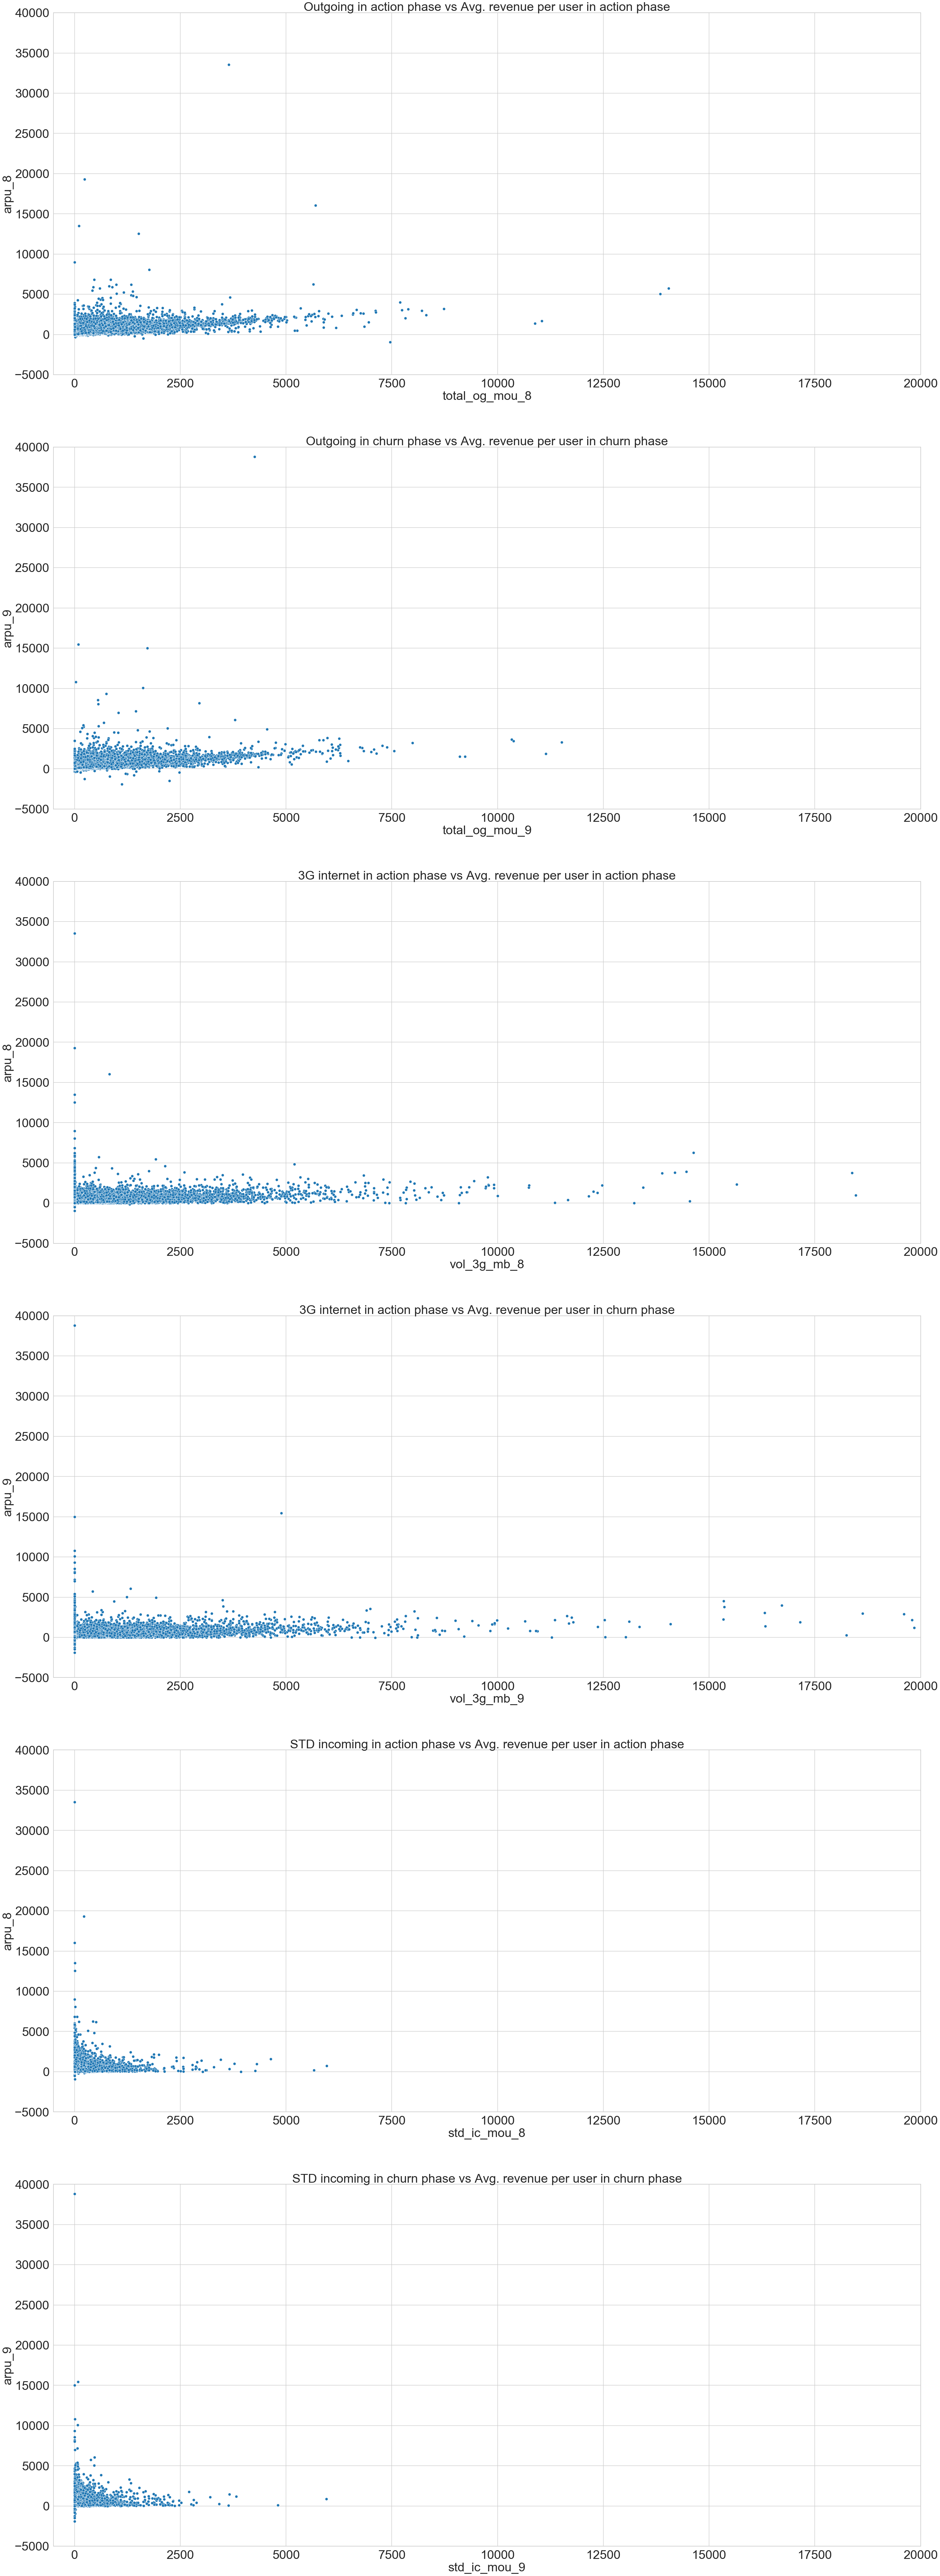

In [25]:
# Setting size of figure, context and gridlines

plt.figure(figsize=(50,150))
plt.tight_layout()

sns.set_style('whitegrid')
sns.set_context('talk')

# Title and columns names for the dataset

col={0:['total_og_mou_8','Outgoing in action phase','arpu_8','Avg. revenue per user in action phase'],
     1:['total_og_mou_9','Outgoing in churn phase','arpu_9','Avg. revenue per user in churn phase'],
     2:['vol_3g_mb_8','3G internet in action phase','arpu_8','Avg. revenue per user in action phase'],
     3:['vol_3g_mb_9','3G internet in action phase','arpu_9','Avg. revenue per user in churn phase'],
     4:['std_ic_mou_8','STD incoming in action phase','arpu_8','Avg. revenue per user in action phase'],
     5:['std_ic_mou_9','STD incoming in churn phase','arpu_9','Avg. revenue per user in churn phase']}

# Visualising the outliers with boxplot for all the variables 

for i in range(6):
    plt.subplot(6,1,i+1)
    plt.yticks(fontsize=40)
    plt.xticks(fontsize=40)
    plt.ylim(-5000,40000)
    plt.xlim(-500,20000)
    plt.title(col[i][1]+' '+'vs'+' '+col[i][3],fontsize=40)
    plt.xlabel(col[i][1],size=40)
    plt.ylabel(col[i][2],size=40)
    sns.scatterplot(x=df[col[i][0]],y=df[col[i][2]],data=df,palette='Paired')  

Points to be concluded from above plotting-
 - Average revenue with outgoing calls exhibits linearity with outliers in action phase, same is shown for churn phase and the    density decreases as well as outliers in this phase.
 - 3G volume data resembles with action phase and churn phase, but in churn phase number of outliers incresases with linearity. 
 - STD incoming calls also shows less usage and revenue when compared with action phase for churn phase.
 
This shows that the customers were not using roaming or std facility well enough hence less revenue is genarated here.

## Derived Metrics

Now, let's derive some columns from the dataset like day since last recharge, this will tell us the user last payment to service provider also this tells us that most of the customers are likely to churn(not all because there may be a case where customer can go out of station).

In [26]:
# Changing the format from object to date type
columns=['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','last_date_of_month_9','date_of_last_rech_6',
        'date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_9']


df[columns]=df[columns].apply(lambda x:pd.to_datetime(x)) 

In [27]:
# Calculating the number of days for last recharge

df['days_since_last_recharge_6']=df['last_date_of_month_6']-df['date_of_last_rech_6']
df['days_since_last_recharge_7']=df['last_date_of_month_7']-df['date_of_last_rech_7']
df['days_since_last_recharge_8']=df['last_date_of_month_8']-df['date_of_last_rech_8']
df['days_since_last_recharge_9']=df['last_date_of_month_9']-df['date_of_last_rech_9']

In [28]:
# Changing the datatype from object to numerical 

df['days_since_last_recharge_6']=df['days_since_last_recharge_6'].astype('str').apply(lambda x:int(x.split(" ")[0]))
df['days_since_last_recharge_7']=df['days_since_last_recharge_7'].astype('str').apply(lambda x:int(x.split(" ")[0]))
df['days_since_last_recharge_8']=df['days_since_last_recharge_8'].astype('str').apply(lambda x:int(x.split(" ")[0]))
df['days_since_last_recharge_9']=df['days_since_last_recharge_9'].astype('str').apply(lambda x:int(x.split(" ")[0]))

In [29]:
# Dropping redundant columns

df=df.drop(columns,axis=1)

In [30]:
# Checking the info of the dataset after derived metrics
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 199 entries, mobile_number to days_since_last_recharge_9
dtypes: float64(160), int64(39)
memory usage: 151.8 MB


### Filtering high value customers
- Getting the high value customers is our main business goal to prediction the churn, hence filtering them.

In [31]:
# Filtering

# Taking mean from both good phase 
df['Average_rch_amt']=df[['total_rech_amt_6','total_rech_amt_7']].mean(axis=1)  

 # doing percentile for 70%
quantile=df['Average_rch_amt'].quantile([0.70]).values

# assigning 1 and 0 for identifying high value customers  
df['High-value customer']=(df['Average_rch_amt']).apply(lambda x :1 if x >= quantile else 0) 

# Checking the count for number of high value customers
df['High-value customer'].value_counts() 

0    69988
1    30011
Name: High-value customer, dtype: int64

## Tagging churners and removing the attributes of the churn phase

In [32]:
# Tagging churn customer and non churn customer with 1 and 0

tag_churners_cols=['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']

df['Churn']=(df['total_ic_mou_9']+df['total_og_mou_9']+df['vol_2g_mb_9']+df['vol_3g_mb_9']).apply(lambda x: 1 if x <= 0 else 0)

df['Churn'].value_counts()

0    89808
1    10191
Name: Churn, dtype: int64

In [33]:
# Dropping redundant columns

df=df.drop(tag_churners_cols,axis=1)

df=df.drop(['mobile_number','circle_id'],axis=1)

## delete columns that belong to the churn month (9th month)


In [34]:
# delete all variables relating to 9th month
df = df.filter(regex='[^9]$', axis=1)
df.shape

(99999, 152)

In [35]:
# Drop the 9th month columns (not needed for training model)
mont_9_columns = list(map(lambda x : x.endswith('_9'),df.columns))
df.drop(df.loc[:,mont_9_columns],axis = 1, inplace=True)

# Model Building

In [36]:
new_df=df.copy()   # Taking copy of our original dataset

In [37]:
# Setting X anf y from the dataset

X=new_df.drop('Churn',1)
y=new_df['Churn']

In [38]:
# Splitting the dataset into train and test set

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100)

## Dimentionality Reduction using PCA
- As we have large number of columns, it will be difficult to create a model hence by using pca we will reduce the number of features

In [39]:
# Importing PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized',random_state=42)
pca.fit(X_train)

PCA(random_state=42, svd_solver='randomized')

In [40]:
#defining components in a new DataFrame
col_names=list(X_train)
pca_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1],'Feature':col_names})
pca_df.head()

,PC1,PC2,Feature
0,0.179275,0.053882,arpu_6
1,0.197504,0.050520,arpu_7
2,0.187708,0.054662,arpu_8
3,0.128515,-0.041986,onnet_mou_6
4,0.145508,-0.050927,onnet_mou_7


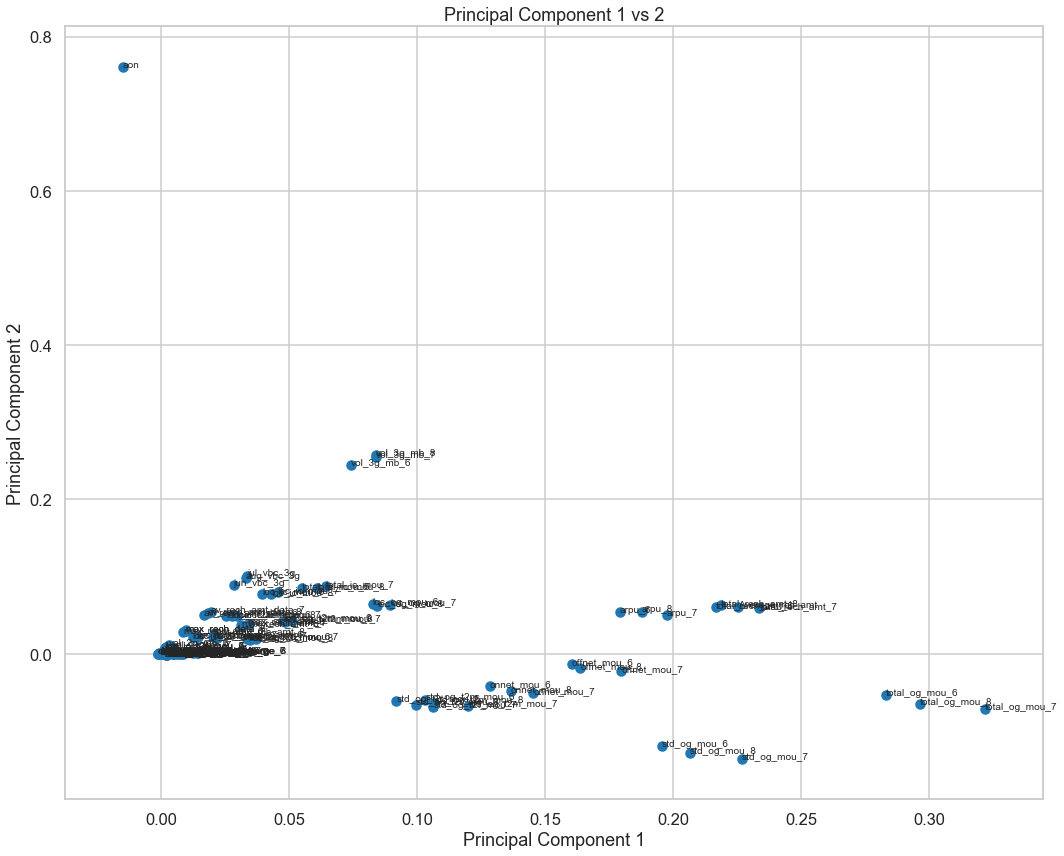

In [41]:
# plotting the two principal components in scatter plot

%matplotlib inline
fig=plt.figure(figsize=(15,12))                 # setting the figure
plt.scatter(pca_df.PC1,pca_df.PC2)            # using scatter plot 
plt.title('Principal Component 1 vs 2')       # setting the title
plt.xlabel('Principal Component 1')           # setting the x-label
plt.ylabel('Principal Component 2')           # setting the x-label

# setting the features name on the datapo ints

for i, txt in enumerate(pca_df.Feature):
    plt.annotate(txt,(pca_df.PC1[i],pca_df.PC2[i]))
    
plt.tight_layout()    # changing the layout
plt.show()            # showing the plot

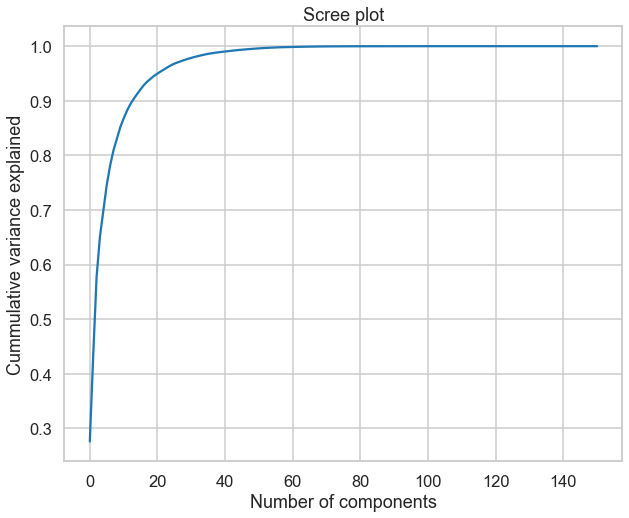

In [42]:
# Screeplot - plotting for cummulative explained_variance_ratio against number of components

# setting the style of the graph and figure size

sns.set_style('whitegrid')
plt.figure(figsize=(10,8))

plt.plot(np.cumsum(pca.explained_variance_ratio_))    # plotting using cumsum

# Labelling the graph on title and axes(X and Y)

plt.title('Scree plot')
plt.xlabel('Number of components')
plt.ylabel('Cummulative variance explained')

plt.show()

From the above screeplot, we can conclude that the number of components 45 is the best to choose , as it is having 97% of variance 

In [43]:
# Importing incremental PCA for efficency

from sklearn.decomposition import IncrementalPCA
pca_final= IncrementalPCA(n_components=45)

In [44]:
# getting data on Pricipal Components
pca_df = pca_final.fit_transform(X_train)
pca_df.shape

(69999, 45)

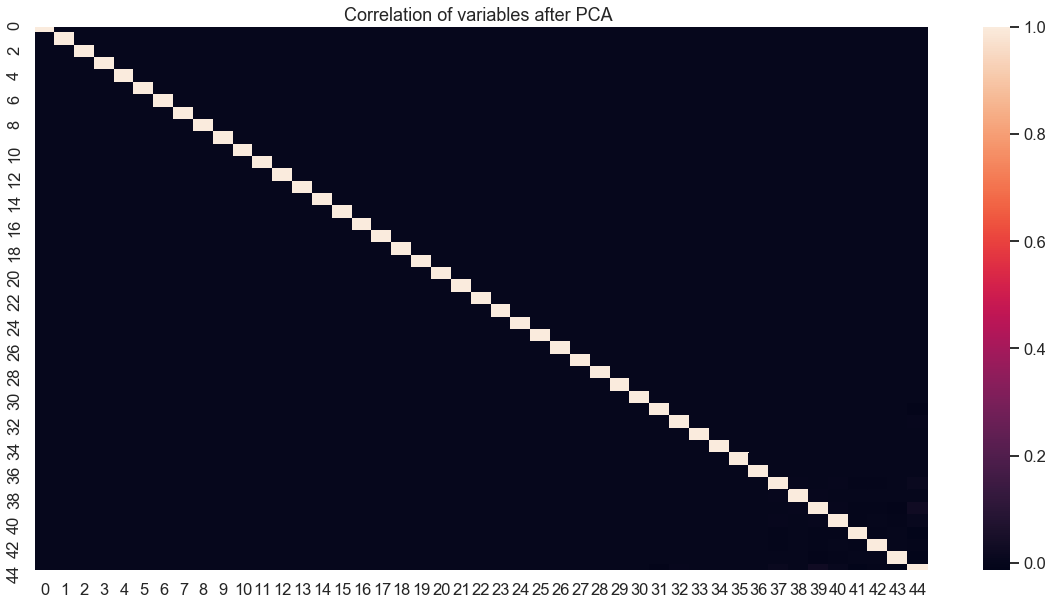

In [78]:
# checking correlation of the new dataset(After PCA)
corr_pca = np.corrcoef(pca_df.transpose())

#plotting heatmap

%matplotlib inline
plt.figure(figsize=(20,10))

# setting title
plt.title("Correlation of variables after PCA ")

#plotting heatmap
sns.heatmap(corr_pca) 

In [46]:
# 1s to 0s in diagonals
diagonals = corr_pca - np.diagflat(corr_pca.diagonal())
print("max corr:",diagonals.max(), ", min corr: ", diagonals.min(),)


max corr: 0.025890235704874035 , min corr:  -0.01378441856754403


#### we see that correlations are indeed very close to 0

In [47]:
#Applying selected components to the test data

df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(30000, 45)

##### Now using this PCA feature , we will use X_train Data - LOGISTIC REGRESSION

In [48]:
# Training the model
from sklearn.linear_model import LogisticRegression

log_pca = LogisticRegression()
model_pca = log_pca.fit(pca_df,y_train)

In [49]:
# Making prediction on the test data

y_pred= model_pca.predict(df_test_pca)

In [50]:
from sklearn.metrics import accuracy_score,recall_score,precision_score, f1_score

print("Accuracy Score:{: }".format(accuracy_score(y_test,y_pred)))
print("Recall Score:{: }".format(recall_score(y_test,y_pred)))
print("F1 Score:{: }".format(f1_score(y_test,y_pred)))

Accuracy Score: 0.9057666666666667
Recall Score: 0.190694626474443
F1 Score: 0.2916562265096467


- As we can see from above evaluation we have high accuracy but less recall and f1 score.

- We have also seen that our data is imbalance which means for one class we have large proportions of data but for another we have less, hence this issue is stopping us from to create a stable model. From next step we will use resampling dataset and we will create more stable model.

## Resampling for handling Data Imbalance
### Oversampling

In [51]:
from sklearn.utils import resample  # Calling resample library

In [52]:
# Oversampling

y=new_df['Churn']
X=new_df.drop('Churn',1)

X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.60,test_size=0.40,random_state=40)  # Splitting the dataset 

X=pd.concat([X_train,y_train],axis=1)  # Again adding only train set

# Diffrentiating the dataset with churn and not churn labels

not_churn=X[X.Churn==0]   
churn=X[X.Churn==1]

churn_upsampled=resample(churn,replace=True, n_samples=len(not_churn),random_state=40)  # resampling the churn dataset as it has less number of rows

upsampled=pd.concat([not_churn,churn_upsampled]) # Adding them in one dataset

upsampled.Churn.value_counts() # checking the count

1    53864
0    53864
Name: Churn, dtype: int64

Now going forward we ill use this train dataset for creating a model

#### Logistic Regression

In [53]:
y_train=upsampled['Churn']         # Creating y train set
X_train=upsampled.drop('Churn',1)  # Creating X train set

pca_final=IncrementalPCA(n_components=45)    # PCA with 45 components

# Doing the transformation

pca_df_train=pca_final.fit_transform(X_train)
pca_df_test= pca_final.transform(X_test)

# Creating model using logistic regression

log_pca = LogisticRegression()
model1=log_pca.fit(pca_df_train,y_train)

In [54]:

y_pred=model1.predict(pca_df_test)   # Predicting the test set

# Model evaluation

print("Accuracy Score is:","{: }".format(accuracy_score(y_test,y_pred)))
print("Recall Score is:","{: }".format(recall_score(y_test,y_pred)))
print("Precision Score is :","{: }".format(precision_score(y_test,y_pred)))
print("F1 Score is:","{: }".format(f1_score(y_test,y_pred)))

Accuracy Score is:  0.754775
Recall Score is:  0.8542899408284024
Precision Score is :  0.2732003469210755
F1 Score is:  0.41400322599916367


#### As we can see after resampling our recall score increased but not the f1 score, lets try another algorithm.

#### Random Forest

In [55]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier(random_state=100)

rfc.fit(X_train,y_train)

RandomForestClassifier(random_state=100)

In [56]:
y_pred_rfc=rfc.predict(X_test)   # Predicting the test set

# Model evaluation

print("Accuracy Score is:","{: }".format(accuracy_score(y_test,y_pred_rfc)))
print("Recall Score is:","{: }".format(recall_score(y_test,y_pred_rfc)))
print("Precision Score is :","{: }".format(precision_score(y_test,y_pred_rfc)))
print("F1 Score is:","{: }".format(f1_score(y_test,y_pred_rfc)))

Accuracy Score is:  0.94295
Recall Score is:  0.6284516765285996
Precision Score is :  0.7668471720818292
F1 Score is:  0.6907859078590787


- As we can see now, all the scores(accuracy, recall, precision and f1) are increased. This does look like stable model.

## Let's try resampling with another technique called SMOTE and compare the results

In [57]:
# pip install  imbalanced-learn

In [58]:
from imblearn.over_sampling import SMOTE

In [59]:
y=new_df.Churn                  # Creating y train set
X=new_df.drop('Churn',axis=1)   # Creating X train set

X_train_sm,X_test_sm,y_train_sm,y_test_sm=train_test_split(X, y, test_size=0.30,random_state=40)  # Splitting the dataset

# SMOTE

smote_df=SMOTE(random_state=40)
X_train_sm,y_train_sm=smote_df.fit_sample(X_train_sm,y_train_sm)

#### Logistic Regression

In [60]:
pca_final=IncrementalPCA(n_components=45)    # PCA with 45 components


# Doing the transformation

pca_df_train=pca_final.fit_transform(X_train_sm)
pca_df_test= pca_final.transform(X_test_sm)


# Creating model using logistic regression

log_pca = LogisticRegression()
model3=log_pca.fit(pca_df_train,y_train_sm)

In [61]:
y_pred=model3.predict(pca_df_test)      # Predicting the test set

# Model evaluation

print("Accuracy Score is:","{: }".format(accuracy_score(y_test_sm,y_pred)))
print("Recall Score is:","{: }".format(recall_score(y_test_sm,y_pred)))
print("Precision Score is :","{: }".format(precision_score(y_test_sm,y_pred)))
print("F1 Score is:","{: }".format(f1_score(y_test_sm,y_pred)))

Accuracy Score is:  0.748
Recall Score is:  0.8482758620689655
Precision Score is :  0.2668112798264642
F1 Score is:  0.4059405940594059


As we can see even with SMOTE resampling, the precision score and f1 score not improved. Hence here random forest comes to the rescue.

#### Random Forest

In [62]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier(random_state=100)

rfc.fit(X_train_sm,y_train_sm)

RandomForestClassifier(random_state=100)

In [63]:
y_pred_rfc=rfc.predict(X_test_sm)    # Predicting the test set

# Model evaluation

print("Accuracy Score is:","{: }".format(accuracy_score(y_test_sm,y_pred_rfc)))
print("Recall Score is:","{: }".format(recall_score(y_test_sm,y_pred_rfc)))
print("Precision Score is :","{: }".format(precision_score(y_test_sm,y_pred_rfc)))
print("F1 Score is:","{: }".format(f1_score(y_test_sm,y_pred_rfc)))

Accuracy Score is:  0.9371666666666667
Recall Score is:  0.6995073891625616
Precision Score is :  0.6870967741935484
F1 Score is:  0.6932465419039869


As we can see now, all the scores(accuracy, recall, precision and f1) are increased. This also does look like stable model but having little less value than the model created with oversampling.

##### Let's try now create two models(from Cross validation) - one from SMOTE Random Forest model and another from Oversampling Random Forest model and compare the final metrics from evaluation for our best model.

## SMOTE 

### k-fold grid search cross validation

In [64]:
# Importing necessary libraries for grid search cross validation

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [65]:
final_smote_rfc=RandomForestClassifier(random_state=50)  # Initialising our object

n_folds=KFold(n_splits=5,shuffle=True,random_state=50)   # Setting number of folds equal to 5

# Passing parameters for tuning

parameters={'criterion':['gini','entropy'],
           'max_depth': range(10,200,50)}

# Creating a model using Gridsearch CV

model_cv= GridSearchCV(estimator=final_smote_rfc,param_grid=parameters,cv=n_folds,verbose=1,
                      return_train_score=True,scoring='recall')

In [66]:
model_cv.fit(X_train_sm,y_train_sm)  # Fitting our model

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed: 90.1min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=50, shuffle=True),
             estimator=RandomForestClassifier(random_state=50),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(10, 200, 50)},
             return_train_score=True, scoring='recall', verbose=1)

In [67]:
model_cv.best_params_    # Getting the best parameters to generate stable model

{'criterion': 'entropy', 'max_depth': 60}

In [68]:
# Random forest classifier

final_smote_rfc=RandomForestClassifier(criterion=model_cv.best_params_['criterion'],max_depth=model_cv.best_params_['max_depth'],random_state=50)
final_smote_rfc.fit(X_train_sm,y_train_sm)                 # Fitting in train set
y_pred_smote_rfc=final_smote_rfc.predict(X_test_sm)        # Predicting in test set

In [69]:
# Model Evaluation

print("Accuracy Score is:","{: }".format(accuracy_score(y_test_sm,y_pred_smote_rfc)))
print("Recall Score is:","{: }".format(recall_score(y_test_sm,y_pred_smote_rfc)))
print("Precision Score is :","{: }".format(precision_score(y_test_sm,y_pred_smote_rfc)))
print("F1 Score is:","{: }".format(f1_score(y_test_sm,y_pred_smote_rfc)))

Accuracy Score is:  0.9365333333333333
Recall Score is:  0.7031198686371101
Precision Score is :  0.6816300541228908
F1 Score is:  0.6922082120918203


The evaluation metrics gives us promising score with 70% of recall and 69% of f1 score.

## Oversampling


### k-fold grid search cross validation

In [70]:
# Importing necessary libraries for grid search cross validation

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [71]:
final_rfc=RandomForestClassifier(random_state=50)       # Initialising our object

n_folds=KFold(n_splits=5,shuffle=True,random_state=50)  # Setting number of folds equal to 5

# Passing parameters for tuning

parameters={'criterion':['gini','entropy'],'max_depth': range(10,200,50)}

# Creating a model using Gridsearch CV

model_cv= GridSearchCV(estimator=final_rfc,param_grid=parameters,cv=n_folds,verbose=1,
                      return_train_score=True,scoring='recall')

In [72]:
model_cv.fit(X_train,y_train)   # Fitting our model

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed: 73.9min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=50, shuffle=True),
             estimator=RandomForestClassifier(random_state=50),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(10, 200, 50)},
             return_train_score=True, scoring='recall', verbose=1)

In [73]:
model_cv.best_params_   # Getting the best parameters to generate stable model

{'criterion': 'gini', 'max_depth': 60}

In [74]:
# Random forest classifier

final_rfc=RandomForestClassifier(criterion=model_cv.best_params_['criterion'],max_depth=model_cv.best_params_['max_depth'],random_state=50)
final_rfc.fit(X_train,y_train)         # Fitting in train set
y_pred_rfc=final_rfc.predict(X_test)   # Predicting in test set

In [75]:
# Model Evaluation

print("Accuracy Score is:","{: }".format(accuracy_score(y_test,y_pred_rfc)))
print("Recall Score is:","{: }".format(recall_score(y_test,y_pred_rfc)))
print("Precision Score is :","{: }".format(precision_score(y_test,y_pred_rfc)))
print("F1 Score is:","{: }".format(f1_score(y_test,y_pred_rfc)))

Accuracy Score is:  0.942575
Recall Score is:  0.6277120315581854
Precision Score is :  0.7638763876387639
F1 Score is:  0.6891324942482069


#### Our final model gives best recall score which is the most important among all the other metric score. This reflects our business goal is acheived.

**Our final model is final_smote_rfc, gives stable model among all the models we have created.**

# Feature Importance

- To find the important features that are strong predictors to churn, below data will show us the all the feature contribution in predciting a churn.

In [82]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": final_smote_rfc.feature_importances_
})
imp_df.sort_values(by="Imp", ascending=False).head(15)

,Varname,Imp
86,total_ic_mou_8,0.070316
14,roam_og_mou_8,0.044641
104,max_rech_amt_8,0.041955
56,total_og_mou_8,0.040709
11,roam_ic_mou_8,0.039988
2,arpu_8,0.034421
107,last_day_rch_amt_8,0.033987
101,total_rech_amt_8,0.028186
68,loc_ic_mou_8,0.026228
62,loc_ic_t2m_mou_8,0.022631


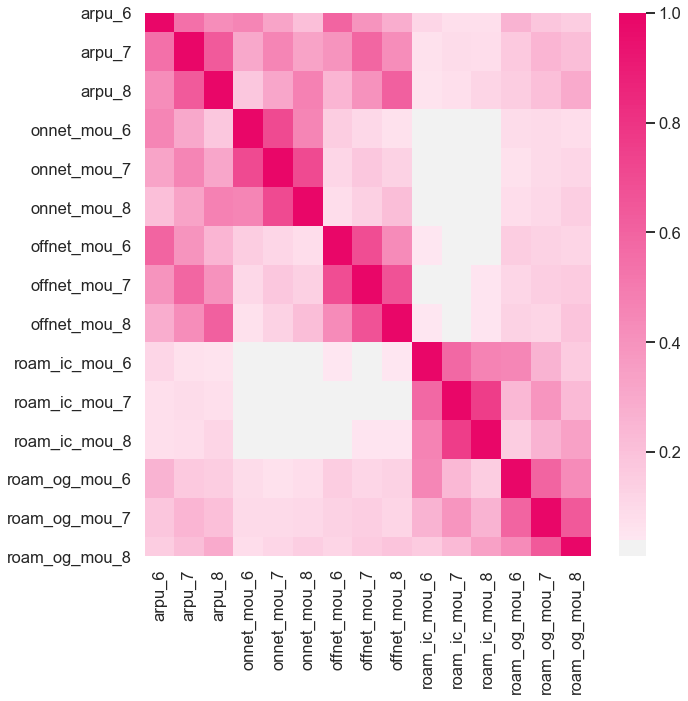

In [77]:
# extract top 'n' features
top_n = 15
top_features = imp_df.Varname[0:top_n]

# plot feature correlation
import seaborn as sns
plt.rcParams["figure.figsize"] =(10,10)
mycmap = sns.diverging_palette(199, 359, s=99, center="light", as_cmap=True)
sns.heatmap(data=X_train[top_features].corr(), center=0.0, cmap=mycmap)

##### Model Explanation

The telecom churn analysis is required to predict the customer churn behavior i.e., if a particular customer is likely to churn or not churn. As the problem preview said - In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.Thus to predict or analyse the behavior of a customer over a time period of good phase and the action phase we created about 3 predictive models as mentioned below -  
    1. Logistic Regression Model.,
     2. Random Forest Classifier. ,
     3. SMOTE technique
The above models were initially created with default parameters which did not give accurate results and the score metrics were not good. Then we hypertuned each model and recreated them with the best estimators. The hyper tuned model showed an increase in the classification scores though marginally. These scores were still not good enough to say the model were good enough. Each of the above models were assessed on area under the curve, precision, recall.
These models did not fare that well and were not able to classify accurately.We then hypertuned each model and recreated them with the best estimators. The hyper tuned model again performed better that their default counterpart. There was an increase in the classification scores. ,
**with final_smote_rfc Technique: ,**
    
- Accuracy Score is:  0.942575
- Recall Score is:  0.6277120315581854
- Precision Score is :  0.7638763876387639
- F1 Score is:  0.6891324942482069

Our final model gives best recall score which is the most important among all the other metric score. This reflects our business goal is acheived.¶
Our final model is final_smote_rfc, gives stable model among all the models we have created 

#### Conclusion

**From the above model, These are most important features business should concentrate on to retain high value customers**

- The company needs to pay attention to the roaming rates. They need to provide good offers for the roaming zone services.
- Local calling customer from one operator to other mobile is huge; Give best offers to them.
- Also give special offers to the customer who are calling locally within same operator.
- The customer who's recharge is max can be provided with more days of validity.